(113, 90, 36)


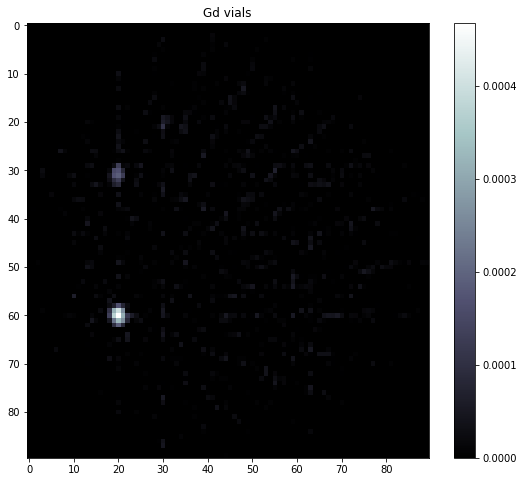

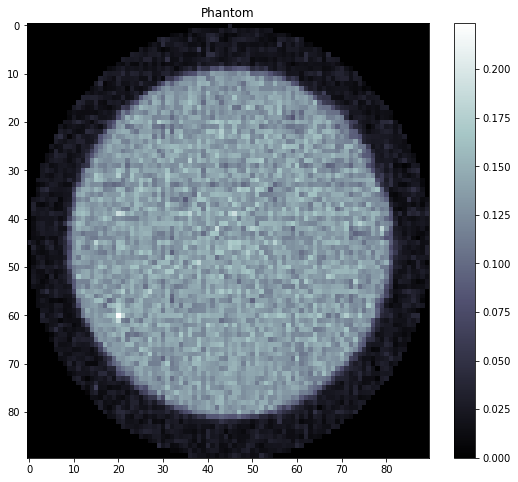

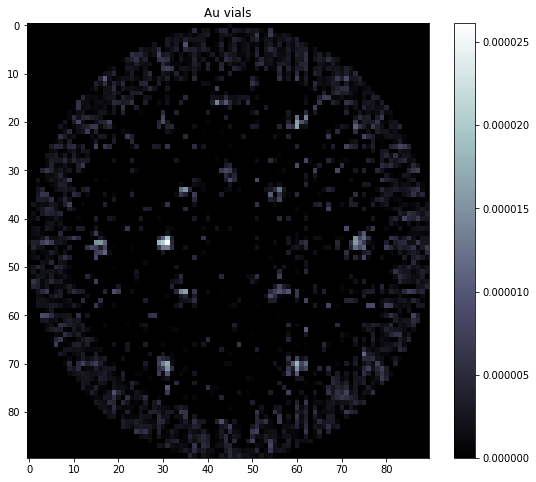

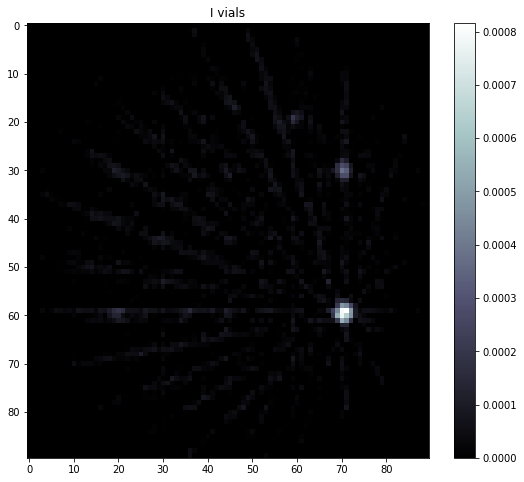

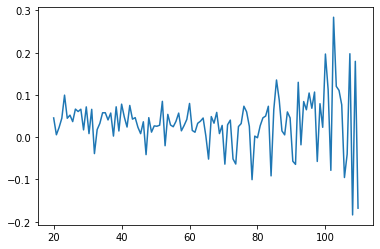

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra
import scipy as sp
%matplotlib inline

bin_width=0.8
bins=np.arange(20,110,bin_width)
# #airscans
airscan_counts = [sum(genfromtxt("Desktop/CT imaging/27-5-2021/air_scan.mca", skip_header=int(round(i*550/81+12)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in bins] 
master_counts=[]
tot_counts=[]
avg_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(0,360,10):
        for j in np.arange(1,91):
            counts = genfromtxt("Desktop/CT imaging/27-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round(bins[k]*550/81+12)),max_rows=int(round(bin_width*550/81)))
            avg_counts.append(-np.log(sum(counts)/int(round(bin_width*550/81))/airscan_counts[k]))
            counts=0
        tot_counts.append(avg_counts)
        avg_counts=[]
    master_counts.append(tot_counts)
    tot_counts=[]
    

master_counts=np.array(master_counts)
master_counts=[np.transpose(x) for x in master_counts]
print(np.shape(master_counts))


#forming the image array
theta=np.arange(0,360,10)
images=[]
for i in np.arange(0,len(bins)):
    images.append(iradon(master_counts[i],theta=theta))
    images[i][images[i]<0]=0

# Collect NIST photon cross section data
mu_Gd=genfromtxt("Desktop/CT imaging/linear attenuation coefficients/Gd_Mu.txt",skip_header=2)
energy_Gd = mu_Gd[::2]*1000
mu_Gd = mu_Gd[1::2]
density_Gd=7.901
mu_Gd= density_Gd*mu_Gd

mu_I=genfromtxt("Desktop/CT imaging/linear attenuation coefficients/I_Mu.txt",skip_header=2)
energy_I = mu_I[::2]*1000
mu_I = mu_I[1::2]
density_I=4.93
mu_I=density_I*mu_I

mu_Au=genfromtxt("Desktop/CT imaging/linear attenuation coefficients/Au_Mu.txt",skip_header=2)
energy_Au = mu_Au[::2]*1000
mu_Au = mu_Au[1::2]
density_Au=19.3
mu_Au=density_Au*mu_Au

mu_Ph=genfromtxt("Desktop/CT imaging/linear attenuation coefficients/Ph_Mu.txt",skip_header=2)
energy_Ph = mu_Ph[::2]*1000
mu_Ph = mu_Ph[1::2]
density_Ph=0.95
mu_Ph=density_Ph*mu_Ph



#Linear interpolation at correct energies
new_mu_Gd=np.interp(bins+bin_width*0.5,energy_Gd,mu_Gd)
new_mu_Au=np.interp(bins+bin_width*0.5,energy_Au,mu_Au)
new_mu_I=np.interp(bins+bin_width*0.5,energy_I,mu_I)
new_mu_Ph=np.interp(bins+bin_width*0.5,energy_Ph,mu_Ph)


#Artificial image creation
image1=np.zeros((90,90))
image2=np.zeros((90,90))
image3=np.zeros((90,90))
image4=np.zeros((90,90))
image5=np.zeros((90,90))

# #image1
# for i in np.arange(5,85):
#     for j in np.arange(5,85):
#         image1[i][j]=new_mu_Ph[0]
# for i in np.arange(10,20):
#     for j in np.arange(10,20):
#         image1[i][j]=new_mu_Gd[0]
# for i in np.arange(70,80):
#     for j in np.arange(70,80):
#         image1[i][j]=new_mu_Au[0]
# for i in np.arange(40,50):
#     for j in np.arange(40,50):
#         image1[i][j]=new_mu_I[0]
        
# #image2
# for i in np.arange(5,85):
#     for j in np.arange(5,85):
#         image2[i][j]=new_mu_Ph[1]
# for i in np.arange(10,20):
#     for j in np.arange(10,20):
#         image2[i][j]=new_mu_Gd[1]
# for i in np.arange(70,80):
#     for j in np.arange(70,80):
#         image2[i][j]=new_mu_Au[1]
# for i in np.arange(40,50):
#     for j in np.arange(40,50):
#         image2[i][j]=new_mu_I[1]
# #image3
# for i in np.arange(5,85):
#     for j in np.arange(5,85):
#         image3[i][j]=new_mu_Ph[2]
# for i in np.arange(10,20):
#     for j in np.arange(10,20):
#         image3[i][j]=new_mu_Gd[2]
# for i in np.arange(70,80):
#     for j in np.arange(70,80):
#         image3[i][j]=new_mu_Au[2]
# for i in np.arange(40,50):
#     for j in np.arange(40,50):
#         image3[i][j]=new_mu_I[2]

# #image4
# for i in np.arange(5,85):
#     for j in np.arange(5,85):
#         image4[i][j]=new_mu_Ph[3]
# for i in np.arange(10,20):
#     for j in np.arange(10,20):
#         image4[i][j]=new_mu_Gd[3]
# for i in np.arange(70,80):
#     for j in np.arange(70,80):
#         image4[i][j]=new_mu_Au[3]
# for i in np.arange(40,50):
#     for j in np.arange(40,50):
#         image4[i][j]=new_mu_I[3]
        
# #image5
# for i in np.arange(5,85):
#     for j in np.arange(5,85):
#         image5[i][j]=new_mu_Ph[4]
# for i in np.arange(10,20):
#     for j in np.arange(10,20):
#         image5[i][j]=new_mu_Gd[4]
# for i in np.arange(70,80):
#     for j in np.arange(70,80):
#         image5[i][j]=new_mu_Au[4]
# for i in np.arange(40,50):
#     for j in np.arange(40,50):
#         image5[i][j]=new_mu_I[4]

# art_images=[image1,image2,image3,image4,image5]
# art_images=np.transpose(art_images)

mu_all=[new_mu_Gd,new_mu_Ph,new_mu_I,new_mu_Au]
images=np.transpose(images)
new_images=[]
for i in np.arange(0,90):
    for j in np.arange(0,90):
         new_images.append(np.linalg.lstsq(np.transpose(mu_all),images[j][i],rcond=None)[0])
            

Gd_image=[];Au_image=[];Ph_image=[];I_image=[]
for i in np.arange(0,8100):
    Gd_image.append(new_images[i][0])
    Ph_image.append(new_images[i][1])
    I_image.append(new_images[i][2])
    Au_image.append(new_images[i][3])

Au_image = [Au_image[i:i+90] for i in range(0, len(Au_image), 90)]
Gd_image = [Gd_image[i:i+90] for i in range(0, len(Gd_image), 90)]
Ph_image = [Ph_image[i:i+90] for i in range(0, len(Ph_image), 90)]
I_image = [I_image[i:i+90] for i in range(0, len(I_image), 90)]
Gd_image=np.array(Gd_image)
Au_image=np.array(Au_image)
I_image=np.array(I_image)
Ph_image=np.array(Ph_image)
Gd_image[Gd_image<0] = 0
Au_image[Au_image<0] = 0
I_image[I_image<0] = 0
Ph_image[Ph_image<0]=0


figure(1,figsize=(9,8))
plt.imshow(Gd_image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Gd vials')

figure(2,figsize=(9,8))
plt.imshow(Ph_image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Phantom')

figure(3,figsize=(9,8))
plt.imshow(Au_image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Au vials')

figure(4,figsize=(9,8))
plt.imshow(I_image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('I vials')
